## Importing relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk, re, string
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

try:
    from gensim.models import word2vec
except:
    !pip install gensim
    from gensim.models import word2vec

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from bs4 import BeautifulSoup
!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
!pip install xgboost
import xgboost
from xgboost import XGBClassifier

sns.set_style('whitegrid')

# The following line is needed to show plots inline in notebooks
%matplotlib inline 

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importing Data

In [2]:
generic = pd.read_csv('generic_tweets.txt')
generic.head()

,class,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
election = pd.read_csv('Canadian_elections_2019.csv')
election.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


## Data Cleaning

First I am creating a function to perform data cleaning for the generic tweets data set. Here I am removing the weblinks, usernames, html tags, stopwords, converting the letters to small case, and stemming the words.

In [4]:
def clean_data(ind):

    result = re.sub(r"http\S+", "", generic.iloc[ind, -1]) 
    result1 = re.sub(r"@\S+", "", result)
    text = BeautifulSoup(str(result1), 'lxml').get_text()
    tokens = re.split(r'\W+', str(text))
    tokens = [w.lower() for w in tokens]
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
  
    stemmer = SnowballStemmer('english')
    stemmatized = [stemmer.stem(word) for word in words]
    
    return(stemmatized)

In [5]:
generic_clean = [str(clean_data(i)) for i in range(len(generic))]

In [6]:
generic['Clean Data'] = generic_clean
generic.head()

,class,id,date,query,user,text,Clean Data
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","['awww', 'bummer', 'shoulda', 'got', 'david', ..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"['upset', 'updat', 'facebook', 'text', 'might'..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,"['dive', 'mani', 'time', 'ball', 'manag', 'sav..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"['whole', 'bodi', 'feel', 'itchi', 'like', 'fi..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","['behav', 'mad', 'see']"


Now I will be cleaning the data for the elections but I will be performing it in 2 parts, as for grouping the tweets based on the political party it targets I need # and @ thus i will be performing a basic cleaning in the first part. Here the weblinks, html tags and punctuations are removed. The letters are converted in small case and the newlines removed.

In [7]:
def cleandata(ind):
    result = re.sub(r"http\S+", "", election.text.iloc[ind][1:-1])
    text = BeautifulSoup(str(result), 'lxml').get_text()
    tw = text.replace('-','').replace('!','').replace('-','').replace('.','').replace("'",'').replace('"','')
    tw = tw.replace('(','').replace(')','')
    tw = tw.replace('/','')
    tw = tw.lower()
    tw = str(tw).split('\\n')
    
    return(tw)

In [8]:
clean_election = [str(cleandata(i)) for i in range(len(election))]

### Data Exploration

For generic tweets I will be plotting the wordcloud for positive, negative and full data after the cleaning otherwise the frequency of the words not imparting any meaning or not relevant for sentiment analysis would be very high and they will be prominent in the wordcloud.

In [9]:
postw_ind = generic[generic['class'] == 4].index #index of positive tweets
negtw_ind = generic[generic['class'] == 0].index #index of negative tweets

In [10]:
negative_tw = [generic_clean[i] for i in negtw_ind]
positive_tw = [generic_clean[i] for i in postw_ind]

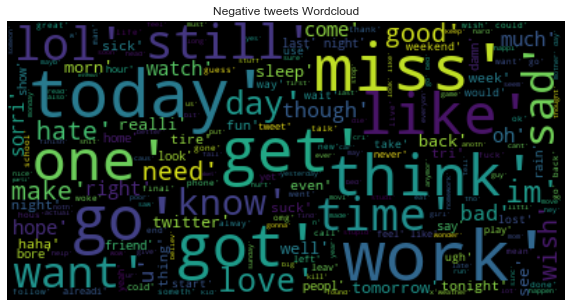

In [11]:
wordcloud = WordCloud(max_font_size=50, background_color="black").generate(str(negative_tw))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Negative tweets Wordcloud')
plt.show()

As shown from the graph, the more the frequency of the words, bigger the number apperars in the wordcloud. The wordcloud represents negative tweets and most prominent words are work, today, miss, sad, sorry etc. which is understandable from the context of the tweets and daily life usage.

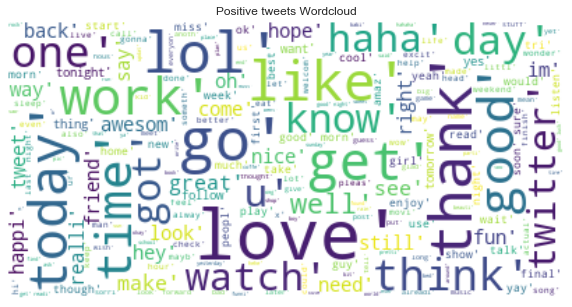

In [12]:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(str(positive_tw))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Positive tweets Wordcloud')
plt.show()

The wordcloud represents positive tweets and most prominent words are lol, love, good, thank etc. which is understandable from the context of the tweets and the daily usage of the words.

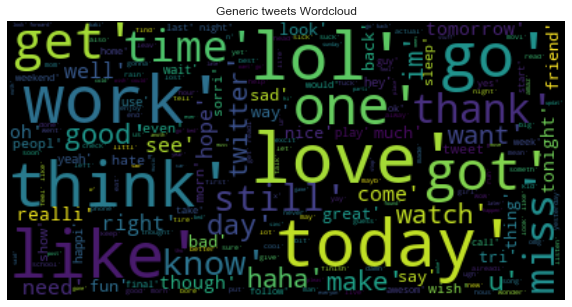

In [13]:
wordcloud = WordCloud(max_font_size=50, background_color="black").generate(str(generic_clean))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Generic tweets Wordcloud')
plt.show()

The wordcloud represents generic tweets and most prominent words are love, like, thank, miss etc. which is a mixture of positive and negative words.

For the elections dataset, the below code will categorize the classification of the tweets for the political party. In this case only the #, @ for the party names and leaders' first name, also the acronymn of the party(eg. lpc, ndp, cpc) and leader's last name are used to categorize, if # and @ are removed then the words like conservative and liberal which are used in normal usage will wrongly categorize the tweet. If a tweet has mention of more than one political party then it is categorized as 'none' as it is difficult to categorize the tweet for a particular party.

In [14]:
party_category = []
party = ''
for i in range(len(election)):
    if (('@justin' in clean_election[i] or '@liberal' in clean_election[i] or 'lpc' in clean_election[i] or '#justin' in clean_election[i] or '#liberal' in clean_election[i] or 'trudeau' in clean_election[i])  and ('cpc' not in clean_election[i] and '#conservative' not in clean_election[i] and '@conservative' not in clean_election[i] and '@andrew' not in clean_election[i] and '#andrew' not in clean_election[i] and 'scheer' not in clean_election[i] and 'ndp' not in clean_election[i] and '@thejagmeet' not in clean_election[i] and '#thejagmeet' not in clean_election[i])):
        party = 'liberal'
    elif (('cpc' in clean_election[i] or '#conservative' in clean_election[i] or '@conservative' in clean_election[i] or '@andrew' in clean_election[i] or '#andrew' in clean_election[i] or 'scheer' in clean_election[i])  and ('@justin' not in clean_election[i] and 'lpc' not in clean_election[i] and '@liberal' not in clean_election[i] and '#justin' not in clean_election[i] and '#liberal' not in clean_election[i] and 'trudeau' not in clean_election[i] and 'ndp' not in clean_election[i] and '@thejagmeet' not in clean_election[i] and '#thejagmeet' not in clean_election[i])):
        party = 'conservative'
    elif (('ndp' in clean_election[i] or '@thejagmeet' in clean_election[i] or '#thejagmeet' in clean_election[i])  and ('cpc' not in clean_election[i] and '#conservative' not in clean_election[i] and '@conservative' not in clean_election[i] and '@andrew' not in clean_election[i] and '#andrew' not in clean_election[i] and 'scheer' not in clean_election[i] and '@justin' not in clean_election[i] and 'lpc' not in clean_election[i] and '@liberal' not in clean_election[i] and '#justin' not in clean_election[i] and '#liberal' not in clean_election[i] and 'trudeau' not in clean_election[i])):
        party = 'NDP'
    else:
        party = 'none'
    party_category.append(party)

In [15]:
election['party_category'] = party_category
election.head()

,sentiment,negative_reason,text,party_category
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",conservative
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",none
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",none
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",none
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",liberal


In [16]:
labels = ['None', 'Conservative', 'Liberal', 'NDP']

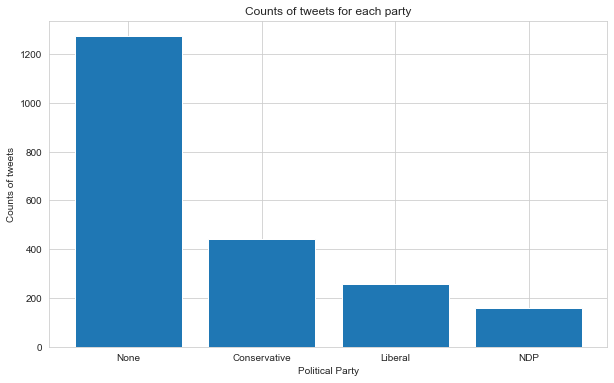

In [17]:
plt.figure(figsize=(10,6))
plt.bar(labels, election['party_category'].value_counts())
plt.xlabel('Political Party')
plt.ylabel('Counts of tweets')
plt.title('Counts of tweets for each party')
plt.show()

The plot shows the count of tweets for each political party. Here the tweets mentioning more than 1 party has been considered as none.

Now, I am interseted in knowing the count of positive and negative tweets for each party.

In [18]:
conservative_ind = election[election['party_category']=='conservative'].index

cpos = 0
cneg = 0
for i in conservative_ind:
    if election.iloc[i,0] == 'positive':
        cpos+=1
    else:
        cneg+=1

In [19]:
liberal_ind = election[election['party_category']=='liberal'].index

lpos = 0
lneg = 0
for i in liberal_ind:
    if election.iloc[i,0] == 'positive':
        lpos+=1
    else:
        lneg+=1

In [20]:
NDP_ind = election[election['party_category']=='NDP'].index

ndpos = 0
ndneg = 0
for i in NDP_ind:
    if election.iloc[i,0] == 'positive':
        ndpos+=1
    else:
        ndneg+=1

In [21]:
none_ind = election[election['party_category']=='none'].index

npos = 0
nneg = 0
for i in none_ind:
    if election.iloc[i,0] == 'positive':
        npos+=1
    else:
        nneg+=1

In [22]:
positive = (npos, cpos, lpos, ndpos)
negative = (nneg, cneg, lneg, ndneg)
positive, negative

((764, 135, 114, 114), (509, 308, 143, 46))

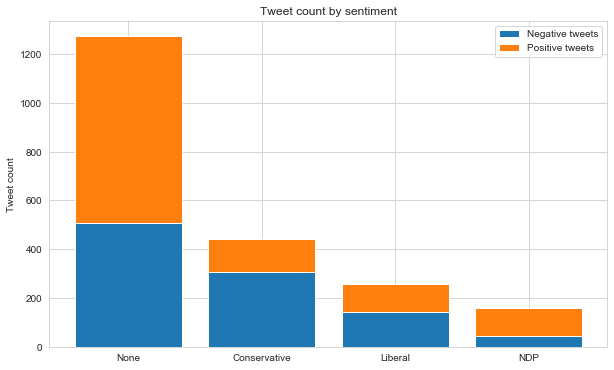

In [23]:
plt.figure(figsize=(10,6))

p1 = plt.bar(labels, negative)
p2 = plt.bar(labels, positive, bottom = negative)

plt.ylabel('Tweet count')
plt.title('Tweet count by sentiment')
plt.legend((p1[0], p2[0]), ('Negative tweets', 'Positive tweets'))

plt.show()

The plot represents the amount of positive or negative tweets for a political party. Considering from the political party point it is clear that NDP and Liberal party got good amount of positive tweets

Now, I would like to know the percentage of positive tweets with respect to total tweets for that political party.

In [24]:
perpos = []
for i in range(4):
    posper = (positive[i]/(positive[i]+negative[i]))*100
    perpos.append(posper)

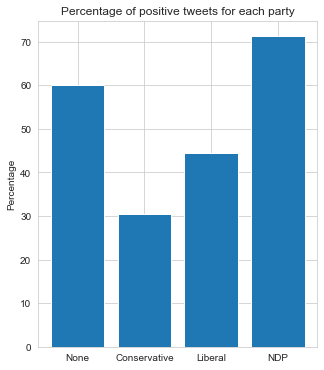

In [25]:
plt.figure(figsize=(5,6))

plt.bar(labels, perpos)

plt.ylabel('Percentage')
plt.title('Percentage of positive tweets for each party')

plt.show()

The plot represents the percentage of positive tweets for a political party, this clearly tells us that NDP got more positive tweets than negative tweets and the conservative party got almost 30% positive tweets, which means that the public is not in favour of conservative party.

### Complete cleaning of the elections dataset

First I am creating a function to perform data cleaning for the elections data set. Here I am removing the usernames, stopwords, and stemming the words.

In [26]:
def finalclean(ind):

    result1 = re.sub(r"@\S+", "", clean_election[ind])

    tokens = re.split(r'\W+', str(result1))

    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    words = [word for word in stripped if word.isalpha()]
    
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
  
    stemmer = SnowballStemmer('english')
    stemmatized = [stemmer.stem(word) for word in words]

    return(stemmatized)

In [27]:
cleanelection = [str(finalclean(i)) for i in range(len(election))]

Now, I am replacing the sentiment as positive and negative with 4 and 0 as it was the same in generic tweets.

In [28]:
election['clean data'] = cleanelection
election['sentiment_new'] = election['sentiment'].map({'negative':0, 'positive':4})
election.head()

,sentiment,negative_reason,text,party_category,clean data,sentiment_new
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",conservative,"['instead', 'suggest', 'agre', 'canadian', 'wo...",0
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",none,"['allwomanspacewalk', 'real', 'etobicokenorth'...",4
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",none,"['brantford', 'go', 'cost', 'billion', 'next',...",0
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",none,"['canada', 'canadavot', 'cant', 'decid', 'help']",4
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",liberal,"['canada', 'taxpay', 'sick', 'tire', 'hard', '...",0


In [29]:
liberal_tw = [election['clean data'][i] for i in liberal_ind]

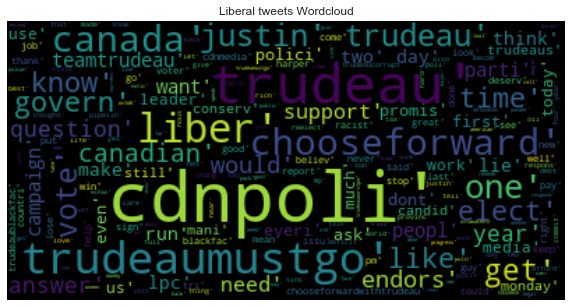

In [30]:
wordcloud = WordCloud(max_font_size=50, background_color="black").generate(str(liberal_tw))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Liberal tweets Wordcloud')
plt.show()

From this wordcloud it seems that 'chooseforward' and the 'trudeaumustgo' have almost the same frequency thus the public is 50-50 for liberal party.

## Model preparation

Calculating the number of features after vectorization in generic tweets data and canadian election data.

In [31]:
vectorizer = CountVectorizer()
array_WF = vectorizer.fit_transform(generic_clean)
print(len(vectorizer.get_feature_names()))

59521


In [32]:
vectorizer_elec = CountVectorizer()
array_elec = vectorizer_elec.fit_transform(cleanelection)
print(len(vectorizer_elec.get_feature_names()))

5461


As the number of features are different in generic data set and elections data set thus we will encounter problem while fitting the model of generic tweets to elections. Thus, we will reduce the number of features from the generic tweets and model from that.

### Bag of words Implementation

Bag of words records the number of times a term occurs in a document.

In [33]:
vectorizer = CountVectorizer(max_features = 5000)
array_WF = vectorizer.fit_transform(generic_clean)

In [34]:
y = generic['class']
X = array_WF
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [35]:
# Implementing the Logisitc regression model
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7628666666666667
              precision    recall  f1-score   support

           0       0.77      0.74      0.76     29847
           4       0.75      0.79      0.77     30153

    accuracy                           0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



In [36]:
# Implementing the Random forest model
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.7274166666666667
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     29847
           4       0.74      0.70      0.72     30153

    accuracy                           0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000



In [37]:
# Implementing the Decision tree model
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

Accuracy: 0.6895666666666667
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     29847
           4       0.70      0.68      0.69     30153

    accuracy                           0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000



In [38]:
# Implementing the SVM model
svcl = LinearSVC(random_state = 0)
svcl.fit(X_train, y_train)
predictions = svcl.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

Accuracy: 0.7605833333333333
              precision    recall  f1-score   support

           0       0.78      0.73      0.75     29847
           4       0.75      0.79      0.77     30153

    accuracy                           0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [39]:
# Implementing the KNN model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

Accuracy: 0.67115
              precision    recall  f1-score   support

           0       0.69      0.61      0.65     29847
           4       0.66      0.73      0.69     30153

    accuracy                           0.67     60000
   macro avg       0.67      0.67      0.67     60000
weighted avg       0.67      0.67      0.67     60000



In [40]:
# Implementing the Naive Bayes model, here multinomialNB is chosen as it is more suitable for text analysis
gnb = MultinomialNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

Accuracy: 0.7540333333333333
              precision    recall  f1-score   support

           0       0.75      0.76      0.75     29847
           4       0.76      0.75      0.75     30153

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



In [41]:
# Implementing the XGBoost model
xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
ACCU = accuracy_score(y_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y_test,predictions))

C:\Users\siddh\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7380666666666666
              precision    recall  f1-score   support

           0       0.78      0.66      0.71     29847
           4       0.71      0.82      0.76     30153

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



### TF-IDF Implementation

Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [42]:
vectorizer1 = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None, max_features = 5000)
array_TFIDF = vectorizer1.fit_transform(generic_clean)

In [43]:
y1 = generic['class']
X1 = array_TFIDF
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0, test_size=0.3)

In [44]:
# Implementing the Logisitc regression model
model1 = LogisticRegression(random_state = 0)
model1.fit(X1_train, y1_train)
predictions = model1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7603666666666666
              precision    recall  f1-score   support

           0       0.77      0.74      0.75     29847
           4       0.75      0.78      0.77     30153

    accuracy                           0.76     60000
   macro avg       0.76      0.76      0.76     60000
weighted avg       0.76      0.76      0.76     60000



In [45]:
# Implementing the Random forest model
rf1 = RandomForestClassifier(random_state = 0)
rf1.fit(X1_train, y1_train)
predictions = rf1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.7274166666666667
              precision    recall  f1-score   support

           0       0.72      0.75      0.73     29847
           4       0.74      0.70      0.72     30153

    accuracy                           0.73     60000
   macro avg       0.73      0.73      0.73     60000
weighted avg       0.73      0.73      0.73     60000



In [46]:
# Implementing the Decision tree model
dt1 = DecisionTreeClassifier(random_state = 0)
dt1.fit(X1_train, y1_train)
predictions = dt1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

Accuracy: 0.68955
              precision    recall  f1-score   support

           0       0.68      0.70      0.69     29847
           4       0.70      0.68      0.69     30153

    accuracy                           0.69     60000
   macro avg       0.69      0.69      0.69     60000
weighted avg       0.69      0.69      0.69     60000



In [47]:
# Implementing the SVM model
svcl1 = LinearSVC(random_state = 0)
svcl1.fit(X1_train, y1_train)
predictions = svcl1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

Accuracy: 0.7534
              precision    recall  f1-score   support

           0       0.77      0.72      0.74     29847
           4       0.74      0.78      0.76     30153

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
# Implementing the KNN model
knn1 = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn1.fit(X1_train, y1_train)
predictions = knn1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

Accuracy: 0.6706833333333333
              precision    recall  f1-score   support

           0       0.69      0.62      0.65     29847
           4       0.66      0.72      0.69     30153

    accuracy                           0.67     60000
   macro avg       0.67      0.67      0.67     60000
weighted avg       0.67      0.67      0.67     60000



In [49]:
# Implementing the Naive Bayes model, here multinomialNB is chosen as it is more suitable for text analysis
gnb1 = MultinomialNB()
gnb1.fit(X1_train, y1_train)
predictions = gnb1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

Accuracy: 0.7467166666666667
              precision    recall  f1-score   support

           0       0.74      0.75      0.75     29847
           4       0.75      0.74      0.75     30153

    accuracy                           0.75     60000
   macro avg       0.75      0.75      0.75     60000
weighted avg       0.75      0.75      0.75     60000



In [50]:
# Implementing the XGBoost model
xgb1 = XGBClassifier(random_state = 0)
xgb1.fit(X1_train, y1_train)
predictions = xgb1.predict(X1_test)
ACCU = accuracy_score(y1_test, predictions)
print('Accuracy:', ACCU)
print(classification_report(y1_test,predictions))

C:\Users\siddh\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:15:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7380666666666666
              precision    recall  f1-score   support

           0       0.78      0.66      0.71     29847
           4       0.71      0.82      0.76     30153

    accuracy                           0.74     60000
   macro avg       0.74      0.74      0.74     60000
weighted avg       0.74      0.74      0.74     60000



## Model Implementation

As my logistic regression model coupled with bag of words gave the best performance amongst all the models, thus I would be using it to predict the results on elections data set.

In [51]:
vectorizer_elec = CountVectorizer(max_features = 5000)
array_elec = vectorizer_elec.fit_transform(cleanelection)

In [52]:
predictions = model.predict(array_elec)
ACCU = accuracy_score(election['sentiment_new'], predictions)
print('Accuracy:', ACCU)

Accuracy: 0.5447726207219878


In [53]:
election['prediction'] = predictions
election.head()

,sentiment,negative_reason,text,party_category,clean data,sentiment_new,prediction
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",conservative,"['instead', 'suggest', 'agre', 'canadian', 'wo...",0,0
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",none,"['allwomanspacewalk', 'real', 'etobicokenorth'...",4,4
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",none,"['brantford', 'go', 'cost', 'billion', 'next',...",0,0
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",none,"['canada', 'canadavot', 'cant', 'decid', 'help']",4,4
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",liberal,"['canada', 'taxpay', 'sick', 'tire', 'hard', '...",0,0


I am now coding to get the number of tweets that were correctly predicted for each party.

In [54]:
ccorr = 0
cincorr = 0
for i in conservative_ind:
    if election['sentiment_new'][i] == election['prediction'][i]:
        ccorr +=1 
    else:
        cincorr +=1

In [55]:
lcorr = 0
lincorr = 0
for i in liberal_ind:
    if election['sentiment_new'][i] == election['prediction'][i]:
        lcorr +=1 
    else:
        lincorr +=1

In [56]:
ndcorr = 0
ndincorr = 0
for i in NDP_ind:
    if election['sentiment_new'][i] == election['prediction'][i]:
        ndcorr +=1 
    else:
        ndincorr +=1

In [57]:
correct = (ccorr, lcorr, ndcorr)
incorrect = (cincorr, lincorr, ndincorr)
label = ['Conservative', 'Liberal', 'NDP']

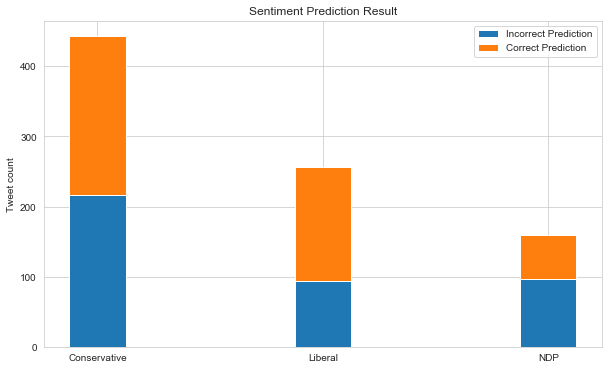

In [58]:
plt.figure(figsize=(10,6))

p1 = plt.bar(label, incorrect, width = 0.25)
p2 = plt.bar(label, correct, width = 0.25, bottom = incorrect)

plt.ylabel('Tweet count')
plt.title('Sentiment Prediction Result')
plt.legend((p1[0], p2[0]), ('Incorrect Prediction', 'Correct Prediction'))

plt.show()

The plot represents the number of tweets that were correctly classified for each party.

Now calculating the percentage of correctly classified tweets for each party.

In [59]:
percorr = []
for i in range(3):
    posper = (correct[i]/(correct[i]+incorrect[i]))*100
    percorr.append(posper)

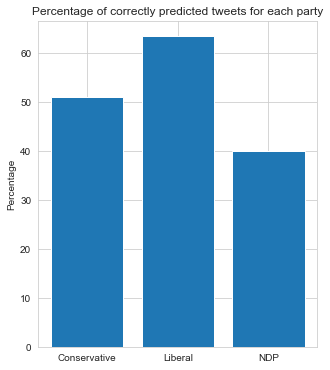

In [60]:
plt.figure(figsize=(5,6))

plt.bar(label, percorr)

plt.ylabel('Percentage')
plt.title('Percentage of correctly predicted tweets for each party')

plt.show()

According to the plot, tweets for liberal party were more correctly classified compared to the other parties.

In [61]:
election['correctly classified'] = 0
for i in election.index:
    if election['sentiment_new'][i] == election['prediction'][i]:
        election['correctly classified'][i] = 'correctly classified'
    else:
        election['correctly classified'][i] = 'incorrectly classified'

election.head()

C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\siddh\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,sentiment,negative_reason,text,party_category,clean data,sentiment_new,prediction,correctly classified
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",conservative,"['instead', 'suggest', 'agre', 'canadian', 'wo...",0,0,correctly classified
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",none,"['allwomanspacewalk', 'real', 'etobicokenorth'...",4,4,correctly classified
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",none,"['brantford', 'go', 'cost', 'billion', 'next',...",0,0,correctly classified
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",none,"['canada', 'canadavot', 'cant', 'decid', 'help']",4,4,correctly classified
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",liberal,"['canada', 'taxpay', 'sick', 'tire', 'hard', '...",0,0,correctly classified


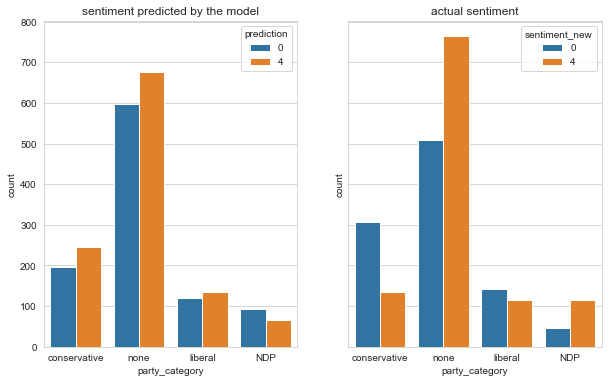

In [62]:
fig, p=plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey = True)
sns.countplot(x='party_category',data=election,hue='prediction',ax=p[0])
p[0].set_title('sentiment predicted by the model')
sns.countplot(x='party_category',data=election,hue='sentiment_new',ax=p[1])
p[1].set_title('actual sentiment')
plt.show()

Here 0 means negative sentiment and 4 means positive sentiment.


Right now my model only has 54.48% accuracy and is not able to fully capture the sentiments because the words in the elections data set might be different than the generic tweets, thus it is not able to capture the whole scenario. The models used, work on the frequency of occurence of the words thus if some words are not considered then the model would not predict correctly. From this graph it is difficult to conclude about the NLP analytics use, but if you consider the graph of the correctly predicted data it relates much to the actual scenario of elections that happened. Thus, NLP is quite a good tool to predict the outcome of elections.

Copying the negative sentiment data set to a new dataframe

In [63]:
negdf = election[election['sentiment_new'] ==0]

In [64]:
negdf = negdf.drop('prediction', axis = 1)
negdf.head()

,sentiment,negative_reason,text,party_category,clean data,sentiment_new,correctly classified
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",conservative,"['instead', 'suggest', 'agre', 'canadian', 'wo...",0,correctly classified
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",none,"['brantford', 'go', 'cost', 'billion', 'next',...",0,correctly classified
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",liberal,"['canada', 'taxpay', 'sick', 'tire', 'hard', '...",0,correctly classified
5,negative,Others,"b""#CanadaVotes2019 #elxn43 #cdnpoli - FACTS - ...",conservative,"['cdnpoli', 'fact', 'blastfromthepast', 'conse...",0,correctly classified
8,negative,Others,"b""#chooseforward #cdnpoli #elxn43\nCanada, Don...",none,"['chooseforward', 'cdnpoli', 'canada', 'dont',...",0,incorrectly classified


Some of the negative reasons mentioned can be clubbed together as they basically belong to the same class.

'Healthcare' and 'Healthcare and Marijuana', 'Tell lies' and 'Scandal', 'Privilege' and 'Economy' essentially address the same thing in the tweets thus these groups can be clubbed together.

In [65]:
c1 = negdf[negdf['negative_reason'] =='Healthcare'].index  
for i in c1:
    negdf.at[i,'negative_reason'] = 'Healthcare and Marijuana'
    
c2 = negdf[negdf['negative_reason'] =='Tell lies'].index  
for i in c2:
    negdf.at[i,'negative_reason'] = 'Scandal'

c3 = negdf[negdf['negative_reason'] =='Privilege'].index  
for i in c3:
    negdf.at[i,'negative_reason'] = 'Economy'

Here I am using bag of words couples with Naive Bayes, Random Forrest and SVM as models.

In [66]:
vectorizer3 = CountVectorizer()
array_WF3 = vectorizer3.fit_transform(negdf['clean data'])

In [67]:
y2 = negdf['negative_reason']
X2 = array_WF3
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size=0.3, stratify = y2)

In [68]:
# Implementing the Naive Bayes model, here multinomialNB is chosen as it is more suitable for text analysis
gnb3 = MultinomialNB()
gnb3.fit(X2_train, y2_train)
predictions1 = gnb3.predict(X2_test)
ACCU = accuracy_score(y2_test, predictions1)
print('Accuracy:', ACCU)
print(classification_report(y2_test,predictions1))

Accuracy: 0.5761589403973509
                                     precision    recall  f1-score   support

                    Climate Problem       0.60      0.25      0.35        12
                            Economy       0.53      0.53      0.53        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.55      0.43      0.48       109
                            Scandal       0.59      0.81      0.68       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.50      0.07      0.12        14

                           accuracy                           0.58       302
                          macro avg       0.40      0.30      0.31       302
                       weighted avg       0.55      0.58      0.54       302



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [69]:
# Implementing the Random forest model
rf3 = RandomForestClassifier(random_state = 0)
rf3.fit(X2_train, y2_train)
predictions2 = rf3.predict(X2_test)
ACCU = accuracy_score(y2_test, predictions2)
print('Accuracy:', ACCU)
print(classification_report(y2_test,predictions2))

Accuracy: 0.6357615894039735
                                     precision    recall  f1-score   support

                    Climate Problem       0.78      0.58      0.67        12
                            Economy       0.67      0.32      0.43        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.53      0.74      0.62       109
                            Scandal       0.73      0.65      0.69       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       1.00      0.50      0.67        14

                           accuracy                           0.64       302
                          macro avg       0.53      0.40      0.44       302
                       weighted avg       0.65      0.64      0.63       302



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
# Implementing the SVM model
svcl3 = LinearSVC(random_state = 0)
svcl3.fit(X2_train, y2_train)
predictions3 = svcl3.predict(X2_test)
ACCU = accuracy_score(y2_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y2_test,predictions3))

Accuracy: 0.6390728476821192
                                     precision    recall  f1-score   support

                    Climate Problem       0.67      0.17      0.27        12
                            Economy       0.64      0.37      0.47        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.56      0.69      0.62       109
                            Scandal       0.70      0.73      0.71       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.88      0.50      0.64        14

                           accuracy                           0.64       302
                          macro avg       0.49      0.35      0.39       302
                       weighted avg       0.63      0.64      0.62       302



## Results

#### Discussion for model 1

Here, I am plotting the graph for predictions made correctly for each political party with positive sentiment tweets.

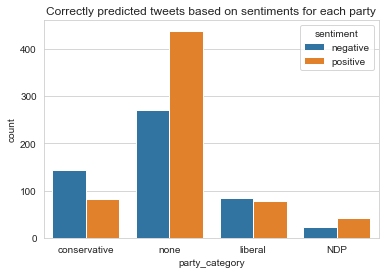

In [71]:
sns.countplot(x='party_category',data=election[election['correctly classified']=='correctly classified'],hue='sentiment')
plt.title('Correctly predicted tweets based on sentiments for each party')
plt.show()

Despite my model being approximately 55% accurate it is able to tell who will lose the elections. As the count of negative tweets for conservative party is far more than the positive tweets it implies that the public is not in favor of conservative party and it will loose the elections, which is buttressed by the fact that conservatives actually lost the elections.

Other parties such as liberal and NDP have comparatively decent positive tweet counts. As it is evident that the people tweeting for liberal party are more in number than the NDP, that means more people are with or against liberals, and the model tells us that the count is almost 50-50 for positive and negative tweets for the liberals, that means liberals have higher possibility of winning the election, which again was true from the election results.

Thus, despite having low accuracy we can predict the election scenario and can get pretty accurate results using NLP. This also means that the sentiments on the twitter can tell about the standing of a political party in public(what public thinks of them).

#### Discussion for model 2 - applied on negative sentiments

As SVM model performed better thus i will be concatinating the y2_test (testing data) with the predictions of SVM model.

In [72]:
x = pd.DataFrame(y2_test)
x['predictions'] = predictions3
x.head()

,negative_reason,predictions
606,Others,Others
1974,Others,Others
1698,Scandal,Scandal
158,Women Reproductive right and Racism,Women Reproductive right and Racism
1011,Women Reproductive right and Racism,Scandal


Checking for the frequency of each reason in the negative tweets dataframe

In [73]:
negdf.negative_reason.value_counts()

Scandal                                468
Others                                 364
Economy                                 63
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Healthcare and Marijuana                 9
Name: negative_reason, dtype: int64

Checking for the frequency of each reason in the test set of negative tweets dataframe

In [74]:
x.negative_reason.value_counts()

Scandal                                140
Others                                 109
Economy                                 19
Women Reproductive right and Racism     14
Climate Problem                         12
Separation                               5
Healthcare and Marijuana                 3
Name: negative_reason, dtype: int64

As observed from above the frequency of 'Scandal' is the highest and the model is getting somewhat 328 (468 - 140) data sets for training, whearas there is not enough frequency for other reasons for modeling, thus the model is having difficulty in predicting the reason for them (skewed data set). Other reason could be due to removal of stopwords, plus the words like cdnpoli is there in every tweet which is not significant in predicting the sentiment but is given lot of weightage thus affecting the accuracy.

Ways to improve the accuracy for model-1 could be better text cleaning techiniques to be used, or word embedding or n gram method to be used, also directly predicting the election data from generic tweet is not a good idea as there are some words that are left out as they were not in generic tweets. Hyperparameters could be tuned for better accuracy.

Ways to improve the accuracy for model-2 could be, more data set for application of model, better text cleaning techniques to be used, hyperparameter tuning could be done, n grams or word embedding method to be used.

### Word Embedding

Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.

Limitations - One of the main limitations of word embeddings (word vector space models in general) is that words with multiple meanings are conflated into a single representation (a single vector in the semantic space). In other words, polysemy and homonym are not handled properly. For example, in the sentence “The club I tried yesterday was great!” it is not clear if the term club is related to the word sense of baseball club, clubhouse, golf club, or any other sense that club might have it. 

In [75]:
tokenized_sentences = [sentence.split() for sentence in negdf['clean data']]
model = word2vec.Word2Vec(tokenized_sentences, size=100, min_count=1)

In [76]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split(' ')
    for word in text:
        vec += model[word].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [77]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 100) for z in negdf['clean data']])
array_wordEmbedding

C:\Users\siddh\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[-4.65356949e-03, -8.37473212e-04,  1.73511593e-03, ...,
        -2.19145525e-03, -8.49702046e-04,  3.05303570e-03],
       [-4.87567118e-03, -8.68988206e-04,  6.89935200e-04, ...,
        -2.51124403e-03, -2.79245264e-04,  2.03837265e-03],
       [-2.48646876e-03,  3.30949946e-04,  2.05912452e-03, ...,
        -1.50492895e-03,  1.28382246e-04,  1.64851036e-03],
       ...,
       [-4.55645790e-03,  2.84252823e-05,  1.45515163e-03, ...,
        -1.93462009e-03, -5.40877421e-04,  2.07960348e-03],
       [-2.94897718e-03, -1.02092337e-03,  1.05596993e-03, ...,
        -1.51080037e-03, -1.48130375e-03,  1.15061729e-03],
       [-6.17782895e-03,  8.27881911e-04,  2.16424644e-03, ...,
        -3.34221496e-03, -1.53576871e-03,  2.02412174e-03]])

In [78]:
y3 = negdf['negative_reason']
X3 = array_wordEmbedding
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size=0.3, stratify = y3)

In [79]:
# Implementing the Random forest model
rf4 = RandomForestClassifier(random_state = 0)
rf4.fit(X3_train, y3_train)
predictions3 = rf4.predict(X3_test)
ACCU = accuracy_score(y3_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y3_test,predictions3))

Accuracy: 0.46688741721854304
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        12
                            Economy       0.00      0.00      0.00        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.44      0.51      0.47       109
                            Scandal       0.50      0.61      0.55       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.00      0.00      0.00        14

                           accuracy                           0.47       302
                          macro avg       0.13      0.16      0.15       302
                       weighted avg       0.39      0.47      0.43       302



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [80]:
# Implementing the SVM model
svcl4 = LinearSVC(random_state = 0)
svcl4.fit(X3_train, y3_train)
predictions3 = svcl4.predict(X3_test)
ACCU = accuracy_score(y3_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y3_test,predictions3))

Accuracy: 0.46357615894039733
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        12
                            Economy       0.00      0.00      0.00        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.00      0.00      0.00       109
                            Scandal       0.46      1.00      0.63       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.00      0.00      0.00        14

                           accuracy                           0.46       302
                          macro avg       0.07      0.14      0.09       302
                       weighted avg       0.21      0.46      0.29       302



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The word embedding with word2vec gave bad results compared to that what we received from bag of words as the problem with word2vec is that it associates similar words with different contextual meaning with almost the same vector space, that's a negative for modeling.

### N Grams

N grams is a contiguous sequence of N items from a given sample of text or speech.

As 1 gram is same as simple bag of words thus i will be solving for bi and tri gram.

#### Bi gram

In [81]:
ngram = CountVectorizer(ngram_range=(2, 2))
array_ng = ngram.fit_transform(negdf['clean data'])

In [82]:
y3 = negdf['negative_reason']
X3 = array_ng
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size=0.3, stratify = y3)

In [83]:
# Implementing the Random forest model
rf4 = RandomForestClassifier(random_state = 0)
rf4.fit(X3_train, y3_train)
predictions3 = rf4.predict(X3_test)
ACCU = accuracy_score(y3_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y3_test,predictions3))

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.40397350993377484
                                     precision    recall  f1-score   support

                    Climate Problem       1.00      0.17      0.29        12
                            Economy       0.00      0.00      0.00        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.37      0.94      0.54       109
                            Scandal       0.68      0.12      0.21       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.00      0.00      0.00        14

                           accuracy                           0.40       302
                          macro avg       0.29      0.18      0.15       302
                       weighted avg       0.49      0.40      0.30       302



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
# Implementing the SVM model
svcl4 = LinearSVC(random_state = 0)
svcl4.fit(X3_train, y3_train)
predictions3 = svcl4.predict(X3_test)
ACCU = accuracy_score(y3_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y3_test,predictions3))

Accuracy: 0.4900662251655629
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        12
                            Economy       0.00      0.00      0.00        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.42      0.89      0.57       109
                            Scandal       0.72      0.36      0.48       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       1.00      0.07      0.13        14

                           accuracy                           0.49       302
                          macro avg       0.31      0.19      0.17       302
                       weighted avg       0.53      0.49      0.43       302



#### Tri gram

In [85]:
ngram = CountVectorizer(ngram_range=(3, 3))
array_ng = ngram.fit_transform(negdf['clean data'])

In [86]:
y3 = negdf['negative_reason']
X3 = array_ng
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, random_state=0, test_size=0.3, stratify = y3)

In [87]:
# Implementing the Random forest model
rf4 = RandomForestClassifier(random_state = 0)
rf4.fit(X3_train, y3_train)
predictions3 = rf4.predict(X3_test)
ACCU = accuracy_score(y3_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y3_test,predictions3))

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.38079470198675497
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        12
                            Economy       0.00      0.00      0.00        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.37      0.99      0.54       109
                            Scandal       0.78      0.05      0.09       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.00      0.00      0.00        14

                           accuracy                           0.38       302
                          macro avg       0.16      0.15      0.09       302
                       weighted avg       0.49      0.38      0.24       302



C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
# Implementing the SVM model
svcl4 = LinearSVC(random_state = 0)
svcl4.fit(X3_train, y3_train)
predictions3 = svcl4.predict(X3_test)
ACCU = accuracy_score(y3_test, predictions3)
print('Accuracy:', ACCU)
print(classification_report(y3_test,predictions3))

Accuracy: 0.38741721854304634
                                     precision    recall  f1-score   support

                    Climate Problem       0.00      0.00      0.00        12
                            Economy       0.00      0.00      0.00        19
           Healthcare and Marijuana       0.00      0.00      0.00         3
                             Others       0.37      0.99      0.54       109
                            Scandal       0.82      0.06      0.12       140
                         Separation       0.00      0.00      0.00         5
Women Reproductive right and Racism       0.00      0.00      0.00        14

                           accuracy                           0.39       302
                          macro avg       0.17      0.15      0.09       302
                       weighted avg       0.51      0.39      0.25       302



### Hyperparameter Tuning

I wanted to perform hyperparamter tuning for logistic regression as logistic regression works best for binary classification thus i am fitting it on generic data set and i will predict it on canadian elections based on sentiments.

In [89]:
model = LogisticRegression(random_state = 0, penalty = 'l1')
parameters = {'C':[1, 5, 10], 'solver':['liblinear', 'saga']}
gsc = GridSearchCV(model, parameters, cv=5)
gsc.fit(X_train, y_train)

C:\Users\siddh\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l1',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [90]:
predictions = gsc.predict(array_elec)
ACCU = accuracy_score(election['sentiment_new'], predictions)
print('Accuracy:', ACCU)

Accuracy: 0.5452414439756212


After Hyperparameter tuning, the accuracy increased from 54.48% to 54.52%